# TITANIC DATASET ANALYSIS

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# ------  Load the Dataset ------
df = pd.read_csv("tested.csv") 
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


# Metadata of the dataset
Passenger number

Survived
0 = Dead 1 = Alive


Pclass
1 = First class 2 = Second class 3 = Third class


Name
Name of passenger


Sex
Gender


Age
Age of passenger


SibSp
Number of siblings


Parch
.


Ticket
Ticket


Fare
.

In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [15]:
# Fill missing Age with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Drop rows with missing Fare or Cabin
df.dropna(subset=['Fare'], inplace=True)

In [25]:
df.drop( 'Cabin', axis = 1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [27]:
# Convert categorical columns (like Sex) to numeric for analysis
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [45]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",1,27.0,0,0,334915,7.7208,Q
409,1301,1,3,"Peacock, Miss. Treasteall",1,3.0,1,1,SOTON/O.Q. 3101315,13.7750,S
410,1302,1,3,"Naughton, Miss. Hannah",1,27.0,0,0,365237,7.7500,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",1,37.0,1,0,19928,90.0000,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",1,28.0,0,0,347086,7.7750,S
413,1305,0,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",0,27.0,1,1,2668,22.3583,C


# Analysing Factors affecting survival

Passenger Class

Pclass
1    0.467290
2    0.322581
3    0.331797
Name: Survived, dtype: float64


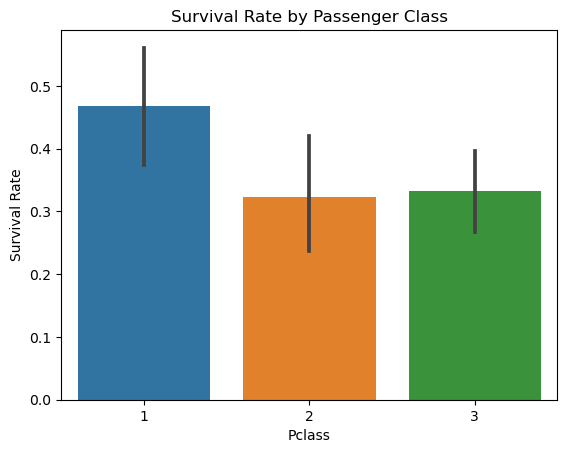

In [40]:
# Survival rate by class
class_survival = df.groupby('Pclass')['Survived'].mean()
print(class_survival)

# Visualization
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

Observation: Higher-class passengers had better survival rates.
Insights:
First Class passengers had the highest survival rate because they had easier access to lifeboats.
Third Class passengers had the lowest survival rate due to their cabins being located farther from lifeboats.

2. Gender

Sex
0    0.0
1    1.0
Name: Survived, dtype: float64


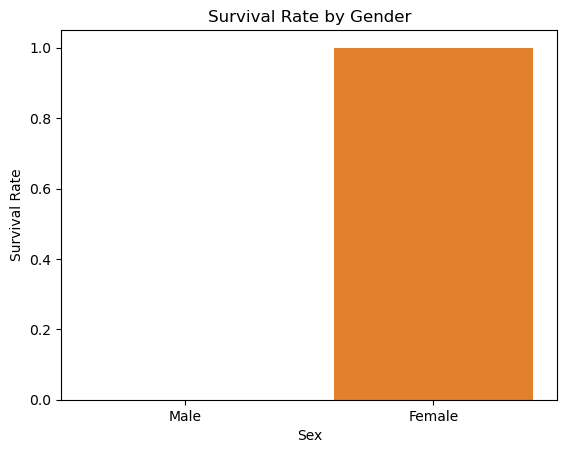

In [65]:
# Survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean()
print(gender_survival)

# Visualization
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Survival Rate')
plt.show()

Observation: Women survived at a much higher rate than men.
Insights:
The "women and children first" protocol was followed during evacuation.

Survival Rates:
Women: ~100%
Men: ~0%

3. Age

AgeGroup
Child          0.480000
Teenager       0.413793
Adult          0.335907
Middle-aged    0.393617
Elderly        0.400000
Name: Survived, dtype: float64


C:\Users\caspe\AppData\Local\Temp\ipykernel_43996\1441421820.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].mean()
C:\Users\caspe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


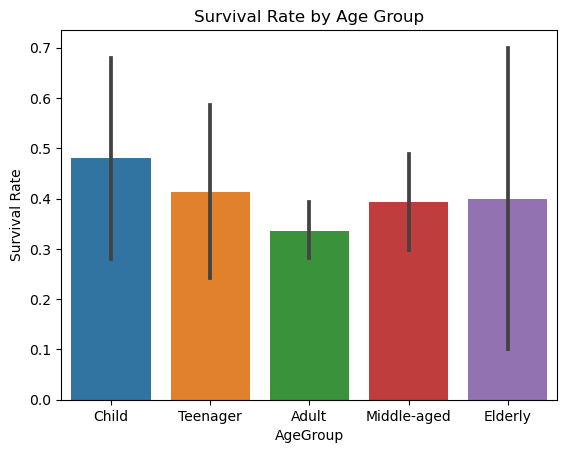

In [50]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teenager', 'Adult', 'Middle-aged', 'Elderly'])

# Survival rate by age group
age_survival = df.groupby('AgeGroup')['Survived'].mean()
print(age_survival)

# Visualization
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()

Observation: Younger passengers (especially children) had better survival chances.
Insights:
Children were prioritized in rescue efforts.
Elderly passengers faced challenges due to physical limitations and where also prioritized

4. Fare

FareGroup
Low          0.263158
Mid          0.270833
High         0.390476
Very High    0.539216
Name: Survived, dtype: float64


C:\Users\caspe\AppData\Local\Temp\ipykernel_43996\2215933063.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('FareGroup')['Survived'].mean()
C:\Users\caspe\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


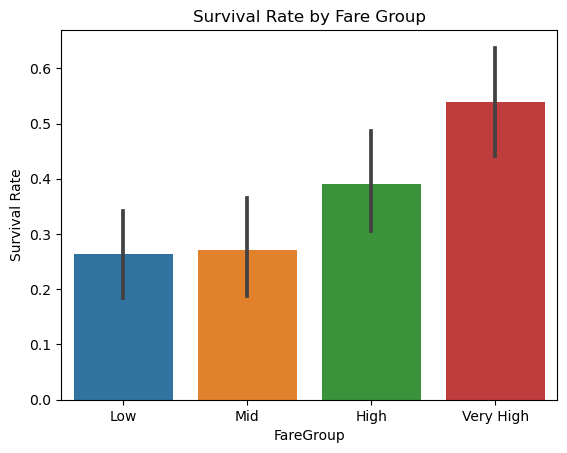

In [52]:
# Survival rate by fare (divide into quartiles)
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])

# Survival rate by fare group
fare_survival = df.groupby('FareGroup')['Survived'].mean()
print(fare_survival)

# Visualization
sns.barplot(x='FareGroup', y='Survived', data=df)
plt.title('Survival Rate by Fare Group')
plt.ylabel('Survival Rate')
plt.show()

Observation: Passengers who paid higher fares had higher survival rates.

Insights:
Fare is correlated with passenger class (higher fare = better class).

approximately 54% of people that paid very high fees survivived

5. Family Size

FamilySize
0     0.269841
1     0.486486
2     0.526316
3     0.714286
4     0.285714
5     0.666667
6     0.250000
7     0.500000
10    0.500000
Name: Survived, dtype: float64


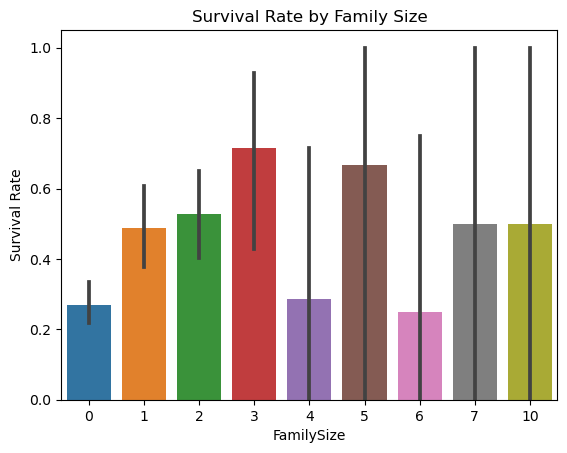

In [54]:
# Create a new column for family size
df['FamilySize'] = df['SibSp'] + df['Parch']

# Survival rate by family size
family_survival = df.groupby('FamilySize')['Survived'].mean()
print(family_survival)

# Visualization
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()

In [ ]:
# Histogram for Age
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram for Fare
plt.figure(figsize=(8, 5))
plt.hist(df['Fare'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribution of Age
Observation:

The histogram shows that the ages of passengers are right-skewed.
The most frequent age group is around 20–30 years, as evidenced by the tallest bar.
There are fewer passengers in both younger (under 10 years) and older (above 50 years) age groups.

INSIGHTS:

Majority of Passengers:

Most passengers were young adults, likely in their 20s or 30s.
This reflects the typical demographics of travelers during that period.

Children and Elderly:

A small number of children (age <10) are visible.
Very few elderly passengers (age >60) were aboard, which could influence survival rates (e.g., children were prioritized in rescue efforts).

OUTLIERS:

Ages above 70 are rare but exist in the dataset.


# Distribution of Fare
Observation:
The histogram for Fare is heavily right-skewed.
The majority of passengers paid fares less than 50 units, as seen in the first bar.
A small number of passengers paid extremely high fares (up to 500 units).

Insights:

Skewness:
The skewness suggests that most passengers were in lower classes or purchased cheaper tickets.
The few passengers who paid very high fares likely traveled in First Class.

Outliers:

A small group of passengers paid over 200 units, which are extreme outliers in this data.

Fare vs. Survival:

Higher fares are typically associated with higher survival rates, as wealthier passengers in First Class had better access to lifeboats.

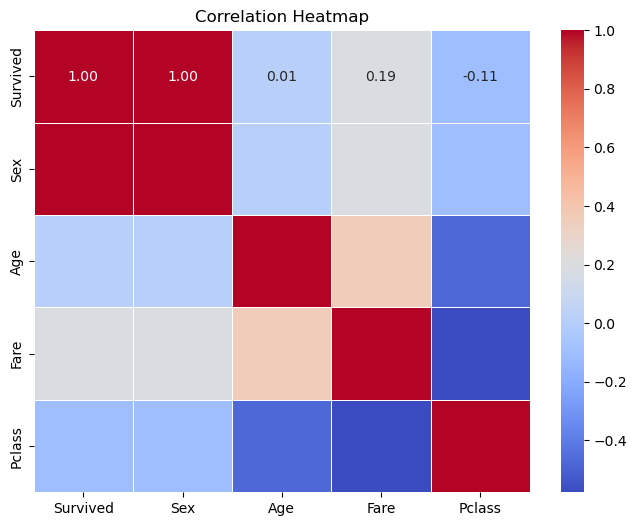

In [76]:

# Compute the correlation matrix
correlation_matrix = df[['Survived', 'Sex','Age', 'Fare', 'Pclass']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Key Observations
Survived Correlations:

Sex (1.00): Strong positive correlation.
Indicates females (encoded as 1) were more likely to survive.

Fare (0.19): Weak positive correlation.
Higher ticket prices (associated with First Class passengers) slightly increased the chances of survival.

Pclass (-0.11): Weak negative correlation.
Lower passenger class (higher class number) slightly reduced survival chances.

Age (0.01): Negligible correlation.
Survival wasn’t strongly dependent on age.

Sex Correlations:

High correlation with survival, reinforcing the idea that gender was a significant factor in survival rates (e.g., women and children were prioritized).

Fare and Pclass:

Fare (-0.55): Strong negative correlation with Pclass.
Passengers in higher classes (First Class, Pclass=1) paid more for tickets.

Other Variables:

Age has very weak correlations with survival and other variables in the dataset.